In [9]:
import pandas as pd
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


# 数据加载和重采样

In [2]:
train = pd.read_csv('./jetrail.csv')

train

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [3]:
train['Datetime'] = pd.to_datetime(train['Datetime'])
train

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2
...,...,...,...
18283,18283,2014-09-25 19:00:00,868
18284,18284,2014-09-25 20:00:00,732
18285,18285,2014-09-25 21:00:00,702
18286,18286,2014-09-25 22:00:00,580


In [5]:
train.drop(['ID'], axis=1, inplace=True)
train.columns = ['ds', 'y']
train

,ds,y
0,2012-08-25 00:00:00,8
1,2012-08-25 01:00:00,2
2,2012-08-25 02:00:00,6
3,2012-08-25 03:00:00,2
4,2012-08-25 04:00:00,2
...,...,...
18283,2014-09-25 19:00:00,868
18284,2014-09-25 20:00:00,732
18285,2014-09-25 21:00:00,702
18286,2014-09-25 22:00:00,580


In [6]:
# 通过设置datetime为index，用resample API按天采样
train.index = train['ds']
daily_train = train.resample('D').sum()

daily_train

,y
ds,
2012-01-09,112
2012-01-10,248
2012-01-11,304
2012-01-12,210
2012-01-13,0
...,...
2014-12-05,6826
2014-12-06,7540
2014-12-07,5858


In [7]:
daily_train = daily_train.reset_index()
daily_train

,ds,y
0,2012-01-09,112
1,2012-01-10,248
2,2012-01-11,304
3,2012-01-12,210
4,2012-01-13,0
...,...,...
1061,2014-12-05,6826
1062,2014-12-06,7540
1063,2014-12-07,5858
1064,2014-12-08,14762


# 创建prophet模型

In [27]:
# # 设置上限
# daily_train['cap'] = 20000
# # 设置下限
# daily_train['floor'] = 0


# m = Prophet(growth='logistic', yearly_seasonality=True, seasonality_prior_scale=0.1)

m = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.1)

m.fit(daily_train)

# 预测未来7个月，213天
future = m.make_future_dataframe(periods=213)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
future

,ds
0,2012-01-09
1,2012-01-10
2,2012-01-11
3,2012-01-12
4,2012-01-13
...,...
1274,2015-07-06
1275,2015-07-07
1276,2015-07-08
1277,2015-07-09


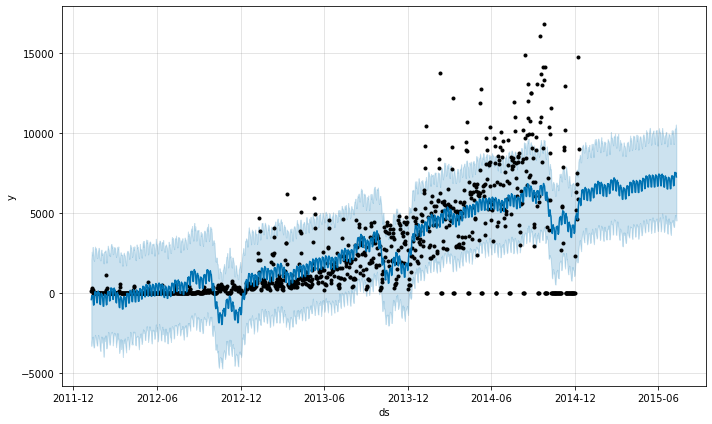

In [29]:
# future['cap'] = 20000
# future['floor'] = 0

y_pred = m.predict(future)

fig = m.plot(y_pred)

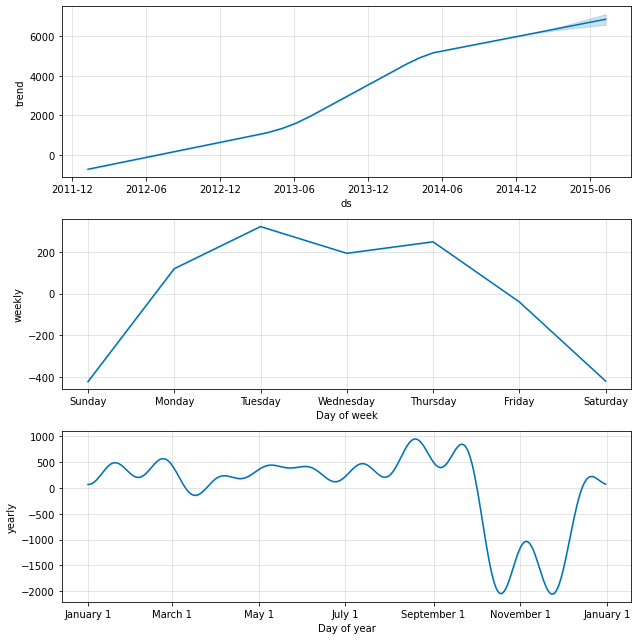

In [30]:
fig = m.plot_components(y_pred)